In [1]:
#4.0
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_diabetes
rng = np.random.RandomState(42)


In [3]:
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)
X_california, y_california = fetch_california_housing(
                             return_X_y=True)
X_california = X_california[:300]
y_california = y_california[:300]
X_diabetes = X_diabetes[:300]
y_diabetes = y_diabetes[:300]

In [66]:
def add_missing_values(X_full, y_full):
    n_samples, n_features = X_full.shape
 # Add missing values in 75% of the lines
    missing_rate = 0.75
    n_missing_samples = int(n_samples * missing_rate)
    
    missing_samples = np.zeros(n_samples, dtype=bool)
    missing_samples[:n_missing_samples] = True
   

    rng.shuffle(missing_samples)
    missing_features = rng.randint(
        0, n_features, n_missing_samples)
    X_missing = X_full.copy()
    X_missing[missing_samples, missing_features] = np.nan
    y_missing = y_full.copy()
    
    return X_missing, y_missing

In [67]:
X_miss_california, y_miss_california = add_missing_values(
    X_california, y_california)
X_miss_diabetes, y_miss_diabetes = add_missing_values(
    X_diabetes, y_diabetes)

In [18]:
def get_scores_for_imputer(imputer, X_missing, y_missing):
    estimator = make_pipeline(imputer, regressor)
    impute_scores = cross_val_score(
        estimator,
        X_missing,
        y_missing,
        scoring="neg_mean_squared_error",
        cv=N_SPLITS
    )
    return impute_scores

In [19]:
rng = np.random.RandomState(0)

from sklearn.ensemble import RandomForestRegressor
# To use the experimental IterativeImputer, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer # noqa
from sklearn.impute import IterativeImputer, KNNImputer,SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
N_SPLITS = 4
regressor = RandomForestRegressor(random_state=0)

In [70]:
x_labels = []
mses_california = np.zeros(5)
stds_california = np.zeros(5)
mses_diabetes = np.zeros(5)
stds_diabetes = np.zeros(5)


In [53]:
def get_full_score(X_full, y_full):
    full_scores = cross_val_score(
        regressor,
        X_full,
        y_full,
        scoring="neg_mean_squared_error", cv=N_SPLITS
    )
    return full_scores.mean(), full_scores.std()


In [54]:
mses_california[0], stds_california[0] = get_full_score(
    X_california, y_california)
mses_diabetes[0], stds_diabetes[0] = get_full_score(
    X_diabetes, y_diabetes)

In [55]:
x_labels.append('original data')

In [68]:
#4.1
def get_impute_zero_score(X_missing, y_missing):
    imputer = SimpleImputer(
        missing_values=np.nan,
        add_indicator=True,
        strategy="constant",
        fill_value=0)
    zero_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return zero_impute_scores.mean(), zero_impute_scores.std()

In [74]:
mses_california[1], stds_california[1] = get_impute_zero_score(
    X_miss_california, y_miss_california
)
mses_diabetes[1], stds_diabetes[1] = get_impute_zero_score(
    X_miss_diabetes, y_miss_diabetes
)
x_labels.append("Zero imputation")

In [57]:
#4.2
def get_impute_knn_score(X_missing, y_missing):
    imputer = KNNImputer(
        missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(
        imputer, X_missing, y_missing)
    return knn_impute_scores.mean(), knn_impute_scores.std()

In [73]:
mses_california[2], stds_california[2] = get_impute_knn_score(
    X_miss_california, y_miss_california)
mses_diabetes[2], stds_diabetes[2] = get_impute_knn_score(
    X_miss_diabetes, y_miss_diabetes)
x_labels.append("KNN Imputation")

In [71]:
#4.3
def get_impute_mean(X_missing, y_missing):
    imputer = SimpleImputer(
        missing_values=np.nan,
        strategy="mean", add_indicator=True)
    mean_impute_scores = get_scores_for_imputer(
        imputer,
        X_missing, y_missing)
    return mean_impute_scores.mean(), mean_impute_scores.std()

In [72]:
mses_california[3], stds_california[3] = get_impute_mean(
    X_miss_california, y_miss_california)
mses_diabetes[3], stds_diabetes[3] = get_impute_mean(
    X_miss_diabetes, y_miss_diabetes)
x_labels.append("Mean Imputation")

In [ ]:
#4.4
def get_impute_iterative(X_missing, y_missing):
    imputer = IterativeImputer(
        missing_values=np.nan,
        add_indicator=True,
        random_state=0,
        n_nearest_features=3,
        max_iter=1,
        sample_posterior=True,
    )
    iterative_impute_scores = get_scores_for_imputer(
        imputer, X_missing, y_missing)
    return iterative_impute_scores.mean(
    ), iterative_impute_scores.std()

In [75]:

mses_california[4], stds_california[4] = get_impute_iterative(
    X_miss_california, y_miss_california)
mses_diabetes[4], stds_diabetes[4] = get_impute_iterative(
    X_miss_diabetes, y_miss_diabetes)
x_labels.append("Iterative Imputation")

In [ ]:
#4.5 Отображение результатов

In [76]:
mses_diabetes = mses_diabetes * -1
mses_california = mses_california * -1

In [77]:
import matplotlib.pyplot as plt
n_bars = len(mses_diabetes)
xval = np.arange(n_bars)
colors = ["r", "g", "b", "orange", "black"]

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (4).

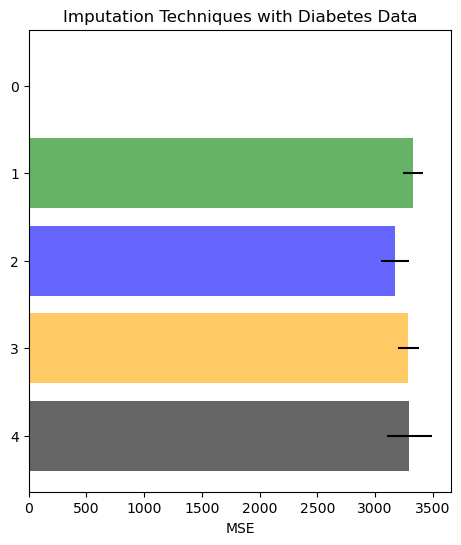

In [78]:
# plot diabetes results
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
for j in xval:
    ax1.barh(
        j,
        mses_diabetes[j],
        xerr=stds_diabetes[j],
        color=colors[j],
        alpha=0.6,
        align="center")
ax1.set_title("Imputation Techniques with Diabetes Data")
ax1.set_xlim(
    left=np.min(mses_diabetes) * 0.9,
    right=np.max(mses_diabetes) * 1.1)
ax1.set_yticks(xval)
ax1.set_xlabel("MSE")
ax1.invert_yaxis()
ax1.set_yticklabels(x_labels)

In [ ]:
# plot california dataset results
ax2 = plt.subplot(122)
for j in xval:
    ax2.barh(
        j,
        mses_california[j],
        xerr=stds_california[j],
        color=colors[j],
        alpha=0.6,
        align="center")
    
ax2.set_title("Imputation Techniques with California Data")
ax2.set_yticks(xval)
ax2.set_xlabel("MSE")
ax2.invert_yaxis()
ax2.set_yticklabels([""] * n_bars)
plt.show()